# PROBLEM STATEMENT 

#                                Taxi Fare Prediction
   
Abstract: In the last few years, the number of for-hire vehicles(renting a car) operating in NY has grown from 63,000 to more than 100,000. However, while the number of trips in app-based vehicles has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data-centric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After all, that set price is not a random guess.

# IMPORTING THE NECESSARY LIBRARIES 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

# LOADING THE DATASET 

In [101]:
df=pd.read_csv('Taxi Fare Prediction/Dataset/TaxiFare.csv')

#Checking the first five rows of the dataset

In [102]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [103]:
#Checking the last five rows of the dataset
df.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [104]:
# Checking the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [105]:
#Check the description of the Dataset
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [106]:
# Checking the columns of the dataset whether they have proper datatype or not
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [107]:
# Checking the datatype of the date_time_of_pickup column
df['date_time_of_pickup'].dtypes

dtype('O')

In [108]:
# Converting date_time_of_pickup column of object to datetime  
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])

In [109]:
# Checking some values of the date_time_of_pickup columns
df['date_time_of_pickup'].head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [110]:
# Making a copy of the Original Dataset and storing it into a new DataFrame
df_1=df.copy()

In [111]:
# Extracting Year,Month,Day,Week_day from the date_time_of_pickup
df_1['Year']=df_1['date_time_of_pickup'].dt.year
df_1['Month']=df_1['date_time_of_pickup'].dt.month
df_1['Day']=df_1['date_time_of_pickup'].dt.day
df_1['Week_day']=df_1['date_time_of_pickup'].dt.weekday

In [112]:
# Extracting Hours,Minute from the date_time_of_pickup
import datetime
df_1['Hours']=df_1['date_time_of_pickup'].dt.hour
#df_1['Minute']=df_1['date_time_of_pickup'].dt.minute

In [113]:
# Checking if the changes that we have done in the code is reflected or not 
df_1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [114]:
# Renaming some columns of the dataset to be more readable format
df_1.rename(columns={'amount':'Fare','longitude_of_pickup':'pickup_longitude',
                    'latitude_of_pickup':'pickup_latitude','longitude_of_dropoff':'dropoff_longitude',
                    'latitude_of_dropoff':'dropoff_latitude','no_of_passenger':'PassengerInTaxi'},inplace=True)

In [115]:
df_1

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,2,23
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0,17
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,6,4
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,1,7


In [116]:
# Checking some Anomalies in the Dataset and investigate if the situation is valid or not
df_1[df_1['Fare']==0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
10002,26:01.0,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1,2010,2,15,0,14
27891,40:28.0,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1,2015,5,15,4,21
47302,13:39.0,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1,2010,3,18,3,19


We can see that there are some Fare price which are zero but the PassengerinTaxi is 1 maybe this 
is a bad data or any other reason but for now we are just focusing on Predicting Taxi Fare so we will
eliminate this rows

In [117]:
# Eliminate the invalid and bad data of the dataset
df_1.drop(index=[10002,27891,47302],inplace=True)

In [118]:
#Check if the condition is applied or not
df_1[df_1['Fare']==0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours


The condition is applied sucessfully and we will see whether there is some more anomalies so that when we start our model building process it should have good data

# MORE ANOMALIES IN THE DATASET

In [119]:
df_1.dtypes

unique_id                           object
Fare                               float64
date_time_of_pickup    datetime64[ns, UTC]
pickup_longitude                   float64
pickup_latitude                    float64
dropoff_longitude                  float64
dropoff_latitude                   float64
PassengerInTaxi                      int64
Year                                 int64
Month                                int64
Day                                  int64
Week_day                             int64
Hours                                int64
dtype: object

In [120]:
df_1['Fare'].dtypes

dtype('float64')

In [121]:
df_1[df_1['Fare']<0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
2039,37:10.0,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1,2010,3,9,1,23
2486,14:27.0,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1,2015,3,22,6,5
13032,57:10.0,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4,2013,8,30,4,8
28839,39:10.0,-2.5,2013-08-11 13:39:10+00:00,-73.785260,40.648442,0.000000,0.000000,1,2013,8,11,6,13
36722,19:45.0,-2.5,2015-04-30 15:19:45+00:00,-73.952187,40.790112,-73.950043,40.792839,1,2015,4,30,3,15
42337,29:46.0,-5.0,2015-03-09 10:29:46+00:00,-73.990974,40.755985,-73.980820,40.759869,1,2015,3,9,0,10


We can see that there are five records where Fare is less than 0 which is invalid so  we need to 
eliminate the records

In [122]:
df_1.drop(index=[2039,2486,13032,28839,36722,42337],inplace=True)

In [123]:
# The condition is applied sucessfully and now we have no Fare Price Less than 0
df_1[df_1['Fare']<0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours


# NOW DOING EXPLORATORY DATA ANALYSIS

In [124]:
# Check if the dataset has missing value or not
df_1.isnull().sum()

unique_id              0
Fare                   0
date_time_of_pickup    0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
PassengerInTaxi        0
Year                   0
Month                  0
Day                    0
Week_day               0
Hours                  0
dtype: int64

The Target Columns are Fare,Pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_longitude and etc need to be explored

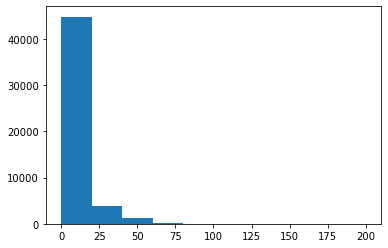

In [125]:
# Checking the histogram of the Fare Columns
plt.hist(df_1['Fare'])
plt.show()

We can see that the (Dependent Variable) Fare Distribution is Right Skewed which is obvious because
of the kind of pickup_location,drop_location and many others thing are considered 
while it is predicted

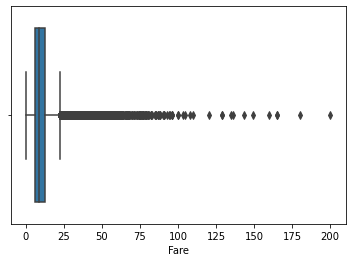

In [126]:
#Checking If the Fare has outlier as it is right skewed so there will some values which will be
#influencing it using seaborn boxplot
sns.boxplot(df_1['Fare'])
plt.show()

In [127]:
# Checking IQR(InterQuartile Range)
Q1=df_1['Fare'].quantile(0.25)
Q3=df_1['Fare'].quantile(0.75)
IQR=Q3-Q1
print('The Inter Quartile Range of the Fare column:',IQR)

The Inter Quartile Range of the Fare column: 6.5


In [128]:
# Check lower_value and higher_value
lower_whisker=Q1-1.5*IQR
higher_whisker=Q3+1.5*IQR
print('The lower whisker value:',lower_whisker)
print('The higher whisker value:',higher_whisker)

The lower whisker value: -3.75
The higher whisker value: 22.25


In [129]:
# Checking lower_extreme and higher_extreme greater than 3 standard deviation
lower_extreme=df_1['Fare'].mean()-3*df_1['Fare'].std()
higher_extreme=df_1['Fare'].mean()+3*df_1['Fare'].std()
print('The lower extreme value :',lower_extreme)
print('The higher extreme value :',higher_extreme)

The lower extreme value : -17.687615714004163
The higher extreme value : 40.42078648474286


In [130]:
df_1[df_1['Fare']<40].shape

(48608, 13)

In [131]:
df_1[df_1['Fare']>40].shape

(1378, 13)

In [132]:
df_1.dtypes

unique_id                           object
Fare                               float64
date_time_of_pickup    datetime64[ns, UTC]
pickup_longitude                   float64
pickup_latitude                    float64
dropoff_longitude                  float64
dropoff_latitude                   float64
PassengerInTaxi                      int64
Year                                 int64
Month                                int64
Day                                  int64
Week_day                             int64
Hours                                int64
dtype: object

In [133]:
df_1.head()

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


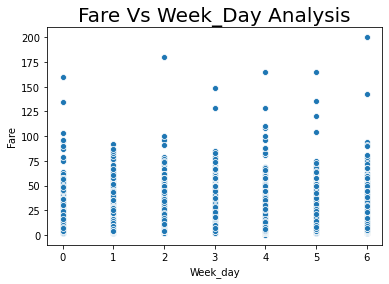

In [134]:
# Checking the relation of Fare vs Week_day
sns.scatterplot(x=df_1['Week_day'],y=df_1['Fare'])
plt.title('Fare Vs Week_Day Analysis',size=20)
plt.show()

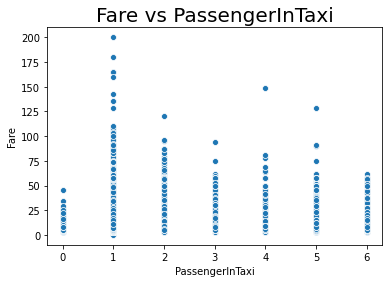

In [135]:
sns.scatterplot(x=df_1['PassengerInTaxi'],y=df_1['Fare'])
plt.title('Fare vs PassengerInTaxi',size=20)
plt.show()

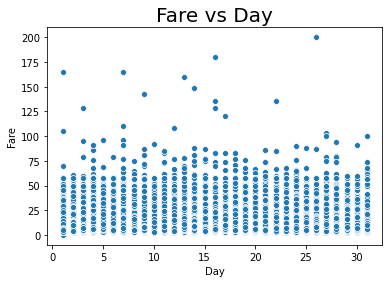

In [136]:
sns.scatterplot(x=df_1['Day'],y=df_1['Fare'])
plt.title('Fare vs Day',size=20)
plt.show()

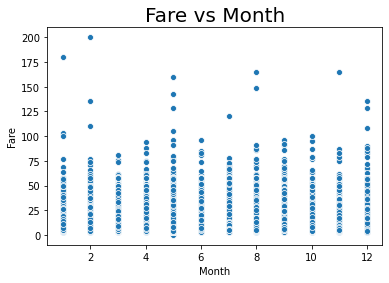

In [137]:
sns.scatterplot(x=df_1['Month'],y=df_1['Fare'])
plt.title('Fare vs Month',size=20)
plt.show()

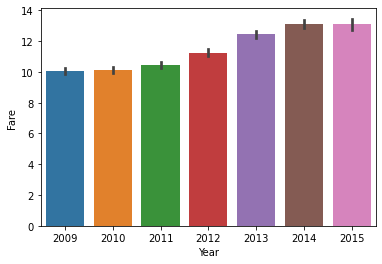

In [138]:
sns.barplot(x=df_1['Year'],y=df_1['Fare'])
plt.show()

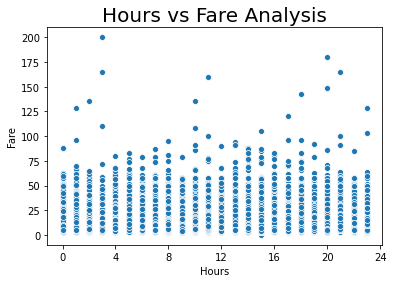

In [142]:
sns.scatterplot(x=df_1['Hours'],y=df_1['Fare'])
plt.title('Hours vs Fare Analysis',size=20)
plt.xticks([0,4,8,12,16,20,24])
plt.show()

<AxesSubplot:xlabel='PassengerInTaxi', ylabel='Fare'>

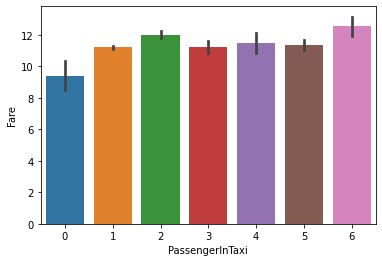

In [143]:
sns.barplot(x=df_1['PassengerInTaxi'],y=df_1['Fare'])

In [435]:
df_3=df_1[df_1['Fare']<75]

In [436]:
df_1.shape

(49991, 13)

In [437]:
df_3.shape

(49928, 13)

In [438]:
df_4=pd.concat([df_3],axis=1)

In [439]:
df_4.shape

(49928, 13)

In [440]:
df_4[df_4['Fare']>40]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
35,15:38.0,58.00,2015-01-11 03:15:38+00:00,-73.983330,40.738720,-73.933197,40.847225,1,2015,1,11,6,3
105,08:52.0,52.00,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,2009,3,25,2,0
132,14:00.0,49.57,2009-09-22 21:14:00+00:00,-73.977023,40.752600,-73.790310,40.643783,2,2009,9,22,1,21
147,19:00.0,52.50,2014-05-13 22:19:00+00:00,-73.982265,40.762062,-73.768550,40.675135,1,2014,5,13,1,22
204,07:00.0,42.50,2011-01-10 16:07:00+00:00,-73.795677,40.807722,-73.978683,40.724365,2,2011,1,10,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49817,37:18.0,45.50,2014-04-07 07:37:18+00:00,-73.789663,40.646879,-73.933732,40.745231,1,2014,4,7,0,7
49920,24:02.0,43.33,2013-06-25 15:24:02+00:00,-73.982455,40.763912,-73.885527,40.773238,1,2013,6,25,1,15
49948,28:05.0,57.33,2014-11-13 06:28:05+00:00,-73.790318,40.646655,-73.984705,40.744271,1,2014,11,13,3,6
49961,47:17.0,48.83,2015-02-16 06:47:17+00:00,-73.997513,40.680462,-73.940933,40.839779,1,2015,2,16,0,6


In [441]:
df_4.shape

(49928, 13)

In [442]:
df_5=df_4[df_4['PassengerInTaxi']>0]
df_5

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,2,23
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0,17
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,6,4
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,1,7


In [443]:
df_5.shape

(49763, 13)

In [444]:
48604-48444

160

In [445]:
df_5[df_5['PassengerInTaxi']==0]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours


In [446]:
df_5[df_5['Fare']>40]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
35,15:38.0,58.00,2015-01-11 03:15:38+00:00,-73.983330,40.738720,-73.933197,40.847225,1,2015,1,11,6,3
105,08:52.0,52.00,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,2009,3,25,2,0
132,14:00.0,49.57,2009-09-22 21:14:00+00:00,-73.977023,40.752600,-73.790310,40.643783,2,2009,9,22,1,21
147,19:00.0,52.50,2014-05-13 22:19:00+00:00,-73.982265,40.762062,-73.768550,40.675135,1,2014,5,13,1,22
204,07:00.0,42.50,2011-01-10 16:07:00+00:00,-73.795677,40.807722,-73.978683,40.724365,2,2011,1,10,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49817,37:18.0,45.50,2014-04-07 07:37:18+00:00,-73.789663,40.646879,-73.933732,40.745231,1,2014,4,7,0,7
49920,24:02.0,43.33,2013-06-25 15:24:02+00:00,-73.982455,40.763912,-73.885527,40.773238,1,2013,6,25,1,15
49948,28:05.0,57.33,2014-11-13 06:28:05+00:00,-73.790318,40.646655,-73.984705,40.744271,1,2014,11,13,3,6
49961,47:17.0,48.83,2015-02-16 06:47:17+00:00,-73.997513,40.680462,-73.940933,40.839779,1,2015,2,16,0,6


In [447]:
df_5

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,2,23
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0,17
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,6,4
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,1,7


In [448]:
df_3[df_3['Fare']>40]

,unique_id,Fare,date_time_of_pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,PassengerInTaxi,Year,Month,Day,Week_day,Hours
35,15:38.0,58.00,2015-01-11 03:15:38+00:00,-73.983330,40.738720,-73.933197,40.847225,1,2015,1,11,6,3
105,08:52.0,52.00,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,2009,3,25,2,0
132,14:00.0,49.57,2009-09-22 21:14:00+00:00,-73.977023,40.752600,-73.790310,40.643783,2,2009,9,22,1,21
147,19:00.0,52.50,2014-05-13 22:19:00+00:00,-73.982265,40.762062,-73.768550,40.675135,1,2014,5,13,1,22
204,07:00.0,42.50,2011-01-10 16:07:00+00:00,-73.795677,40.807722,-73.978683,40.724365,2,2011,1,10,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49817,37:18.0,45.50,2014-04-07 07:37:18+00:00,-73.789663,40.646879,-73.933732,40.745231,1,2014,4,7,0,7
49920,24:02.0,43.33,2013-06-25 15:24:02+00:00,-73.982455,40.763912,-73.885527,40.773238,1,2013,6,25,1,15
49948,28:05.0,57.33,2014-11-13 06:28:05+00:00,-73.790318,40.646655,-73.984705,40.744271,1,2014,11,13,3,6
49961,47:17.0,48.83,2015-02-16 06:47:17+00:00,-73.997513,40.680462,-73.940933,40.839779,1,2015,2,16,0,6


In [449]:
df_5.shape

(49763, 13)

In [450]:
# Splitting it into Independent and Dependent Variables
X=df_5.drop(['Fare','unique_id','date_time_of_pickup'],axis=1)
y=df_5.Fare.values
print(X.shape)
print(y.shape)

(49763, 10)
(49763,)


In [318]:
df_5.to_csv('Taxi Fare Prediction/Dataset/TaxiFareNewData.csv')

In [451]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(39810, 10) (39810,)
(9953, 10) (9953,)


In [467]:
# Starting model Building
#n_estimators=120,max_depth=9,random_state=12
#max_depth= 15,n_estimators= 100,random_state=45
model_rf=RandomForestRegressor(max_depth= 15,n_estimators= 100,random_state=45,ccp_alpha=0.05)
model_rf.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=0.05, max_depth=15, random_state=45)

In [468]:
# Prediction
y_pred=model_rf.predict(X_test)

In [469]:
# Checking r2_score
accuracy_rf_train=r2_score(y_train,model_rf.predict(X_train))
accuracy_rf_test=r2_score(y_test,y_pred)
rmse_test=mean_squared_error(y_test,y_pred)
print(accuracy_rf_train)
print(accuracy_rf_test)
print(rmse_test)

0.7817938221471592
0.7566558377788891
19.52492497220183


In [350]:
param_grid=({'max_depth':np.arange(0,10,1),'n_estimators':np.arange(0,150,10), 'ccp_alpha':(0.1,0.5,0.01)})

In [352]:
# Perform HyperParameter Tuning
#from sklearn.model_selection import GridSearchCV
#grid=GridSearchCV(model_rf,param_grid=param_grid,cv=5,scoring='r2',n_jobs=-1,verbose=5)
#grid.fit(X_train,y_train)

In [196]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 120}

In [197]:
grid.best_score_

0.6570065031988689

In [202]:
grid.best_estimator_

RandomForestRegressor(max_depth=9, n_estimators=120)

In [203]:
grid.cv_results_

{'mean_fit_time': array([9.55458641e-02, 4.47747231e-02, 5.43680191e-02, 7.49576092e-02,
        1.17733097e-01, 9.27468300e-02, 1.11536121e-01, 1.36521959e-01,
        1.42118216e-01, 1.53312397e-01, 1.51712704e-01, 2.09679174e-01,
        2.14876413e-01, 2.12477970e-01, 2.05082703e-01, 1.87897682e-02,
        3.65989637e-01, 6.66815519e-01, 1.17932234e+00, 1.57229691e+00,
        1.66185131e+00, 2.23451695e+00, 2.48177528e+00, 2.90812874e+00,
        3.21715331e+00, 3.71346679e+00, 3.93953753e+00, 5.38690643e+00,
        6.21903019e+00, 6.63578959e+00, 2.73852348e-02, 8.71499538e-01,
        1.94468322e+00, 2.88374300e+00, 3.25453091e+00, 3.85118918e+00,
        4.05147414e+00, 5.75609422e+00, 6.05892119e+00, 5.88002324e+00,
        6.39972534e+00, 7.03176312e+00, 7.85169191e+00, 8.82733207e+00,
        8.82932992e+00, 1.61892414e-02, 9.86432314e-01, 1.74399848e+00,
        2.77460675e+00, 3.59813375e+00, 4.76346388e+00, 5.68733444e+00,
        6.69215665e+00, 7.61722622e+00, 9.11836

In [206]:
grid.best_params_

{'max_depth': 9, 'n_estimators': 120}

In [254]:
grid.best_score_

0.6570065031988689

In [464]:
df_5.shape

(49763, 13)